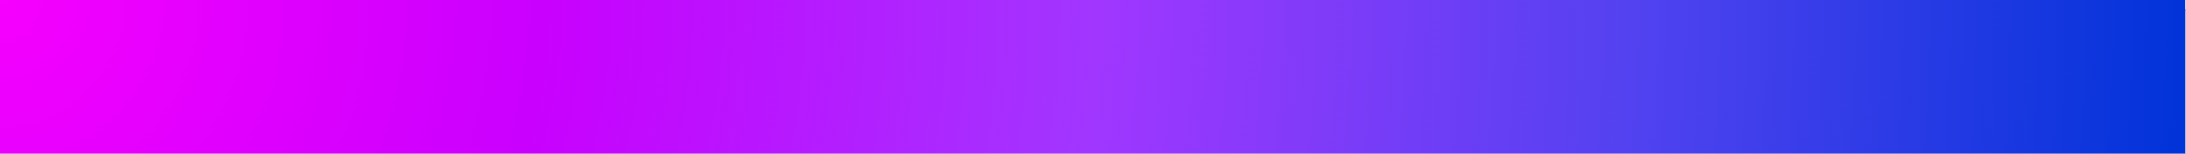
# **Introduction to Decision Trees with Python**

**Lesson by**: Megan Chiovaro, Ph.D. (@mchiovaro)

In this lesson, we’ll learn how to use decision trees for classification tasks. We'll work with the [Cover Types dataset from the UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/31/covertype). This dataset includes data about forests, such as elevation, aspect, and hill shade, and we’ll classify forest cover types based on these *variables*, more commonly knows in machine learning as "*features*".

**What You'll Learn**

1. How to load and explore a dataset.
2. How to train a decision tree model.
3. How to evaluate the model's accuracy.
4. How to visualize the decision tree.
5. How to identify the most important features to improve accuracy.

**What is a Decision Tree?**

A decision tree is a flowchart-like structure used for decision-making. It splits data into branches based on feature values until a decision (classification) is made.

Key components involved in building a decision tree classifier include:

- **Nodes**:
  - ***Decision Node***: Asks a question and branches based on the answer. You will create a structure to handle these nodes.
  - ***Leaf Node***: Contains the final classification or prediction based on the data that reaches this node. This will need a mechanism to store class counts.

  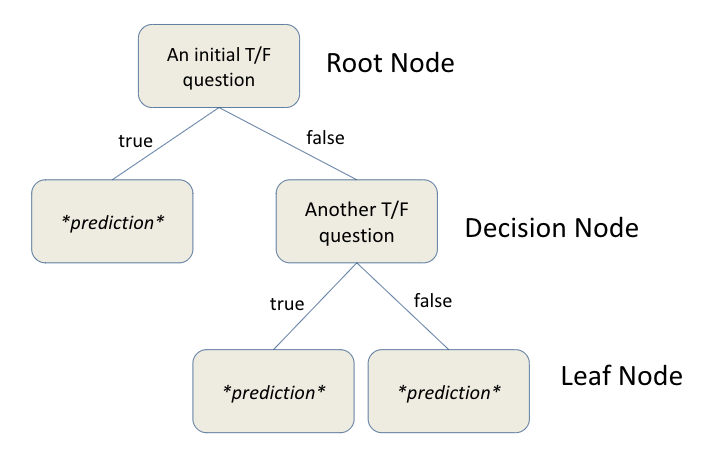
- **Question**: Represents a query about a feature (e.g., "Is Elevation >= 300?"). Each decision node has its own question.
- **Partitioning**: The process of dividing the dataset into two subsets (True and False) based on the question asked.
- **Impurity Measures**: Metrics like *Gini impurity* help assess the quality of a split. The higher the number, the more impure the subset of data is. In other words, there are a wider variety of classes still in that subset. We want a low impurity measure, because it means that we've done a better job at partitioning our classes.
- **Information Gain**: A measure that quantifies the effectiveness of a split. In other words, how much better did we get at separating our classes by including this node. It is a way of comparing the impurity of the parent and children nodes at any given split.

In this coding exercise, you will work through the implementation of a decision tree using several open source Python packages.

## Step 1: Import Required Libraries
First, we'll load the necessary Python libraries.

Libraries are like toolkits that add extra functionality to Python. This helps us avoid re-creating functions that others have already shared with the community.

In [ ]:
# Importing essential libraries
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo # For getting the dataset
import pandas as pd  # For handling data
import numpy as np   # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier  # For decision tree modeling
from sklearn.metrics import accuracy_score  # For evaluating model performance
from sklearn.tree import plot_tree # For displaying our tree
import matplotlib.pyplot as plt # For help with plotting

## Step 2: Load the Dataset
We’ll load the Forest Types dataset. The dataset is available online, so we’ll download it directly.

**Note**: For the remainder of this notebook, you will see 'XXXX' throughout the code. This indicates that you must insert some code in these locations. This will allow us to start writing code live during the lesson, reinforcing our Python knowledge.

In [ ]:
# fetch dataset
raw_data = fetch_ucirepo(id=31)

# split data into features and target variable
X = XXXX
y = XXXX

# Convert to Pandas DataFrame for better visualization and handling
X = pd.DataFrame(XXXX, columns=XXXX)
y = pd.Series(y['XXXX'].values, name="XXXX")

# Keep only the first 10 columns of X
X = X.iloc[XXXX, XXXX]  # Select all rows (:) and first 10 columns

# Display the first few rows of the dataset
print(XXXX)
print(XXXX)

Let's consider what each of these variables (i.e., "features") is measuring.

- `Elevation`: Elevation in meters
- `Aspect`: Aspect in degrees azimuth
- `Slope`: Slope in degrees
- `Horizontal_Distance_To_Hydrology`: Horz Dist to nearest surface water features
- `Vertical_Distance_To_Hydrology`: Vert Dist to nearest surface water features
- `Horizontal_Distance_To_Roadways`: Horz Dist to nearest roadway
- `Hillshade_9am`: Hillshade index at 9am, summer solstice
- `Hillshade_Noon`: Hillshade index at noon, summer soltice
- `Hillshade_3pm`: Hillshade index at 3pm, summer solstice
- `Horizontal_Distance_To_Fire_Points`: Horz Dist to nearest wildfire ignition points

Which do you think will be most important for identifying our target variable, Cover Type?

- `Cover_Type`:
  - 1: Spruce/Fir
  - 2: Lodgepole Pine
  - 3: Ponderosa Pine
  - 4: Cottonwood/Willow
  - 5: Aspen
  - 6: Douglas-fir
  - 7: Krummholz

## Step 3: Explore the Dataset
Understanding the data is critical before building a model. Let’s check the data size and look for any missing values.

In [ ]:
# Check dataset dimensions
print(f"Feature Dimensions: {XXXX}")
print(f"Target Dimensions: {XXXX}")

# Check for missing values
print("Missing Values:")
print(XXXX)

## Step 4: Prepare the Data
We need to prepare the data for modeling. This includes splitting the dataset into features (X) and target labels (y), and then creating training and testing datasets.

In [ ]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(XXXX, XXXX, XXXX, XXXX)

print(f"Training set size: {XXXX} rows")
print(f"Testing set size: {XXXX} rows")

## Step 5: Build a Decision Tree Model
We’ll use the DecisionTreeClassifier from scikit-learn to build our decision tree model.

In [ ]:
# Create a decision tree classifier
dt_model = DecisionTreeClassifier(XXXX, XXXX)

# Train the model on the training data
dt_model.fit(XXXX, XXXX)
print("Decision tree model trained successfully!")

## Step 6: Visualize the Decision Tree
Let's visualize the decision tree to help us understand how it makes decisions.

In [ ]:
plt.figure(figsize=(45, 15))  # Set the figure size
plot_tree(
    dt_model,                  # Tell the function which model to use
    feature_names=X.columns,   # Include feature names
    class_names=[str(i) for i in np.unique(y)],  # Add class names
    filled=True,               # Use colors to represent class distributions
    fontsize=20                # Increase font size for readability
)
plt.title("Decision Tree Visualization", fontsize=40)  # Add a title with larger font
plt.show()

## Step 7: Evaluate the Model
We’ll use the model to make predictions on the testing set and evaluate its performance using accuracy.

In [ ]:
# Predict on the test set
y_pred = dt_model.XXXX(XXXX)

# Calculate accuracy
accuracy = accuracy_score(XXXX, XXXX)
print(f"Model Accuracy: {accuracy * 100}%")

## Step 8: Analyze Feature Importance
Let’s calculate the feature importance values and visualize them. This will help us identify which features are most influential in classifying forest types.

In [ ]:
# Get feature importance from the decision tree model
feature_importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the top 10 features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

## Step 9: Experiment with the Model
Try tweaking the model to see how it affects performance. For example, let's change the depth of the tree.

Scroll back up to step 5 and change the variable `max_depth`.

## Step 10: Explore Different Tree Depths

Try to figure out the ideal value for a "hyperparamter," such as max depth of the tree, can be extremely time consuming. There are many models that have multiple hyperparameters that must be tuned.

Instead of trying different numbers for depth one at a time, we can use methods which allow us to more quickly test out a bunch of values to find the best one.

Let's create a loop to find the optimal number for `max_depth`!

In [ ]:
# List of different max_depth values to try
min_depth = XXXX
max_depth = XXXX
depth_range = range(min_depth, max_depth)
accuracies = []

# Train and evaluate the model for each max_depth
for depth in XXXX:
    # Create and fit the model
    dt_model = DecisionTreeClassifier(max_depth=XXXX, random_state=24)
    dt_model.fit(XXXX, XXXX)

    # Make predictions
    y_pred = dt_model.predict(XXXX)

    # Calculate accuracy
    acc = accuracy_score(XXXX, XXXX)
    XXXX

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depth_range, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Max Depth of Decision Tree", fontsize=16)
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.xticks(range(min_depth, max_depth))
plt.show()

# Step 11: A Few Thought Experiments on Decision Trees

**The Impact of Decision Depth**

Consider the following scenarios where the decision tree has different max depths:

- `max_depth` = 1: The tree makes decisions based on just one factor, such as elevation.
  - What kinds of mistakes might this approach lead to? (e.g., failing to consider hillshade distance to hydrology.)
  - How could this simplicity help or hurt?
- `max_depth` = 3: The tree considers up to three factors.
  - How might this improve accuracy compared to `max_depth` = 1?
  - Could it miss important nuances, especially in highly diverse forests?
- `max_depth` = very high: The tree uses every detail in the dataset to make decisions.
  - What risks come with this approach? (e.g., the tree might rely on patterns that don’t generalize well to new areas, refered to as being "overfit")
  - How could this lead to poor decisions in forest management?

**Consideration for other Real-World Problems**

Think about how selecting the max depth relates to the following real-world decision-making situations.

- **Urban Planning**: When planning a city, leaders often focus on a few key factors (like population density and road access) but may overlook others (like the impact on green spaces or microclimates).
  - If you were using a decision tree for urban planning, would you prefer a shallow tree that focuses on a few key issues or a deeper tree that tries to account for every detail? Why?
- **Healthcare Decisions**: In diagnosing diseases, doctors balance simplicity (basing decisions on common symptoms) with complexity (considering rare conditions).
  - How might a "shallow" decision tree work for healthcare?
  - When could an overly "deep" tree cause harm?
- **Climate Change Policies**: Governments need to balance short-term economic goals with long-term environmental impacts.
  - If decision trees guided policies, what depth would you choose? Should they focus on broad, immediate patterns or delve into every possible future scenario?

**The Consequences of Different Selections**

- In what situations might simplicity in decision-making be better than complexity, and in which is it worse?
- How does the concept of "depth" in decision trees mirror human decision-making in the real world?
- When have you seen real-world decisions fail because they were either too simplistic or overly detailed?

